# Covid-19 Data Analysis
+ Covid-19 was discovered first in Wuhan, China. 
+ It changed the course of people's lives and lifestyles and impacted many people.


## Data sources
+ https://www.kaggle.com/imdevskp/corona-virus-report#covid_19_clean_complete.csv

## Questions
+ Number of cases
+ Which country has the highest cases
+ Top countries affected
+ Distribution Per continent
+ Cases per day
+ Cases per country

In [90]:
import geopandas as geo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from shapely.geometry import Point, Polygon
import descartes 

In [5]:
df = pd.read_csv(r"C:\Users\sidp2\OneDrive\Desktop\New folder\new_data.csv")

In [6]:
df.head()

,Unnamed: 0,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.2264 31.8257)
1,1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.4142 40.1824)
2,2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.874 30.0572)
3,3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.9874 26.0789)
4,4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.8343 36.0611)


In [7]:
df.columns


Index(['Unnamed: 0', 'Province_State', 'Country_Region', 'Lat', 'Long', 'Date',
       'Confirmed', 'Deaths', 'Recovered', 'geometry'],
      dtype='object')

## Correlation Graph

Text(0.5, 1.0, 'Correlation Graph of the Dataset')

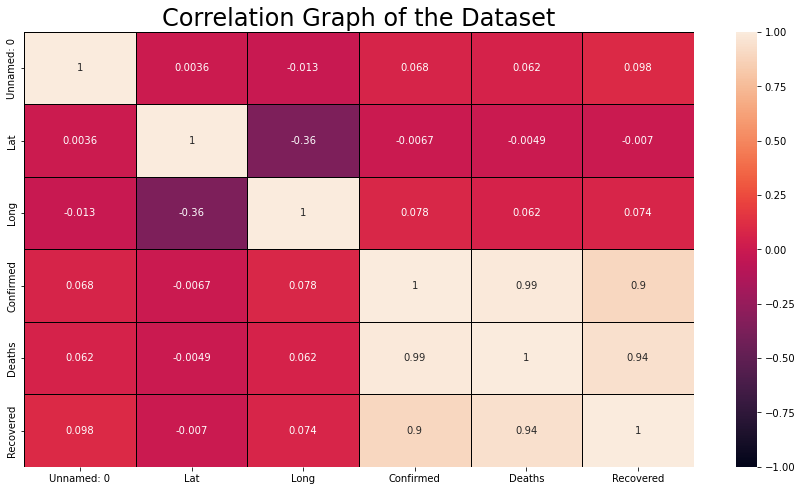

In [8]:
# correlation graph
plt.figure(figsize=(15, 8))
correlation = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, linewidths=1, linecolor='black')
correlation.set_title('Correlation Graph of the Dataset', fontdict={'fontsize': 24})

## Density Plot

C:\Users\sidp2\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sidp2\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density Plot of the Deaths and Recovered')

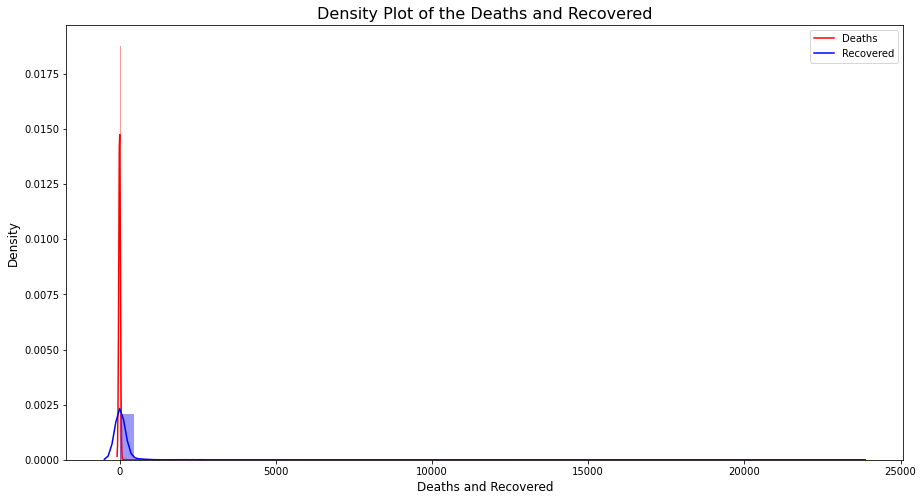

In [9]:
plt.figure(figsize=(15, 8))
sns.distplot(df['Deaths'], color='red')
sns.distplot(df['Recovered'], color='blue')
plt.xlabel("Deaths and Recovered", fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(['Deaths', 'Recovered'], loc='upper right')
plt.title("Density Plot of the Deaths and Recovered", fontsize=16)

In [10]:
df.dtypes

Unnamed: 0          int64
Province_State     object
Country_Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
geometry           object
dtype: object

## Pie chart for affected countries

<AxesSubplot:ylabel='Country_Region'>

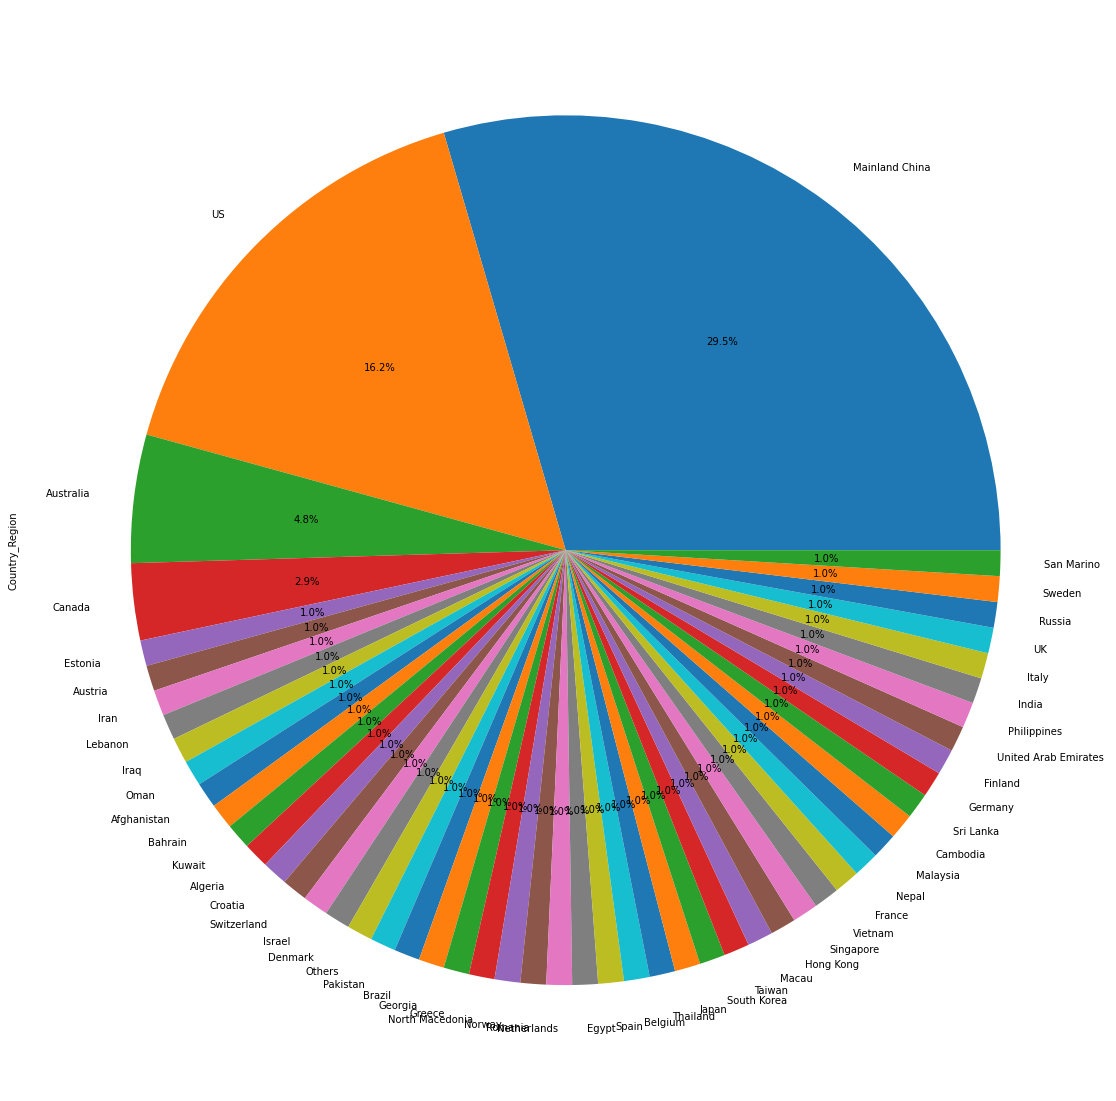

In [11]:
#piechart
plt.figure(figsize=(40,20))
df['Country_Region'].value_counts().plot.pie(autopct="%1.1f%%")

In [12]:
# shape of dataset
df.shape


(3885, 10)

In [13]:
#datatypes
df.dtypes


Unnamed: 0          int64
Province_State     object
Country_Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
geometry           object
dtype: object

In [14]:
# first 10
df.head(10)

,Unnamed: 0,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.2264 31.8257)
1,1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.4142 40.1824)
2,2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.874 30.0572)
3,3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.9874 26.0789)
4,4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.8343 36.0611)
5,5,Guangdong,Mainland China,23.3417,113.4244,1/22/20,26,0,0,POINT (113.4244 23.3417)
6,6,Guangxi,Mainland China,23.8298,108.7881,1/22/20,2,0,0,POINT (108.7881 23.8298)
7,7,Guizhou,Mainland China,26.8154,106.8748,1/22/20,1,0,0,POINT (106.8748 26.8154)
8,8,Hainan,Mainland China,19.1959,109.7453,1/22/20,4,0,0,POINT (109.7453 19.1959)
9,9,Hebei,Mainland China,38.0428,114.5149,1/22/20,1,0,0,POINT (114.5149 38.0428)


In [15]:
df = df[['Province_State', 'Country_Region', 'Lat', 'Long', 'Date',
       'Confirmed', 'Deaths', 'Recovered']]

In [16]:
df.isna().sum()

Province_State    1665
Country_Region       0
Lat                  0
Long                 0
Date                 0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

In [17]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000
mean,32.252000,45.775760,396.487773,10.804118,78.544402
std,18.256877,84.338854,4017.397180,137.191519,846.918788
min,-37.813600,-123.869500,0.000000,0.000000,0.000000
25%,27.610400,8.227500,0.000000,0.000000,0.000000
50%,35.191700,78.000000,2.000000,0.000000,0.000000
75%,42.315400,113.614000,40.000000,0.000000,4.000000
max,64.000000,153.400000,65596.000000,2641.000000,23383.000000


In [18]:
# Number of cases per day/date
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0


In [19]:
df.columns

Index(['Province_State', 'Country_Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [20]:
df.groupby('Date')['Confirmed','Deaths','Recovered'].sum()

C:\Users\sidp2\AppData\Local\Temp/ipykernel_5796/1015638181.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Date')['Confirmed','Deaths','Recovered'].sum()


,Confirmed,Deaths,Recovered
Date,,,
02-01-2020,12038,259,284
02-02-2020,16787,362,472
02-03-2020,19881,426,623
02-04-2020,23892,492,852
02-05-2020,27636,564,1124
02-06-2020,30818,634,1487
02-07-2020,34392,719,2011
02-08-2020,37121,806,2616
02-09-2020,40151,906,3244


In [21]:
df_per_day = df.groupby('Date')['Confirmed','Deaths', 'Recovered'].max()

C:\Users\sidp2\AppData\Local\Temp/ipykernel_5796/3937464187.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_per_day = df.groupby('Date')['Confirmed','Deaths', 'Recovered'].max()


In [22]:
df_per_day.head()


,Confirmed,Deaths,Recovered
Date,,,
02-01-2020,7153,249,168
02-02-2020,11177,350,295
02-03-2020,13522,414,386
02-04-2020,16678,479,522
02-05-2020,19665,549,633


In [23]:
df.groupby('Date')['Confirmed','Deaths','Recovered'].max()

C:\Users\sidp2\AppData\Local\Temp/ipykernel_5796/188372896.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Date')['Confirmed','Deaths','Recovered'].max()


,Confirmed,Deaths,Recovered
Date,,,
02-01-2020,7153,249,168
02-02-2020,11177,350,295
02-03-2020,13522,414,386
02-04-2020,16678,479,522
02-05-2020,19665,549,633
02-06-2020,22112,618,817
02-07-2020,24953,699,1115
02-08-2020,27100,780,1439
02-09-2020,29631,871,1795


In [24]:
df_per_day.head()

,Confirmed,Deaths,Recovered
Date,,,
02-01-2020,7153,249,168
02-02-2020,11177,350,295
02-03-2020,13522,414,386
02-04-2020,16678,479,522
02-05-2020,19665,549,633


In [25]:
df_per_day.describe()


,Confirmed,Deaths,Recovered
count,37.000000,37.000000,37.000000
mean,32616.756757,1082.513514,5338.540541
std,25664.132012,915.678972,6895.411802
min,444.000000,17.000000,28.000000
25%,5806.000000,204.000000,141.000000
50%,29631.000000,871.000000,1795.000000
75%,61682.000000,1921.000000,9128.000000
max,65596.000000,2641.000000,23383.000000


In [26]:
#Max no. of cases
df_per_day['Confirmed'].max()

65596

In [27]:
# Min no. of cases
df_per_day['Confirmed'].min()

444

In [28]:
# Date for maximum no. of cases
df_per_day['Confirmed'].idxmax()

'2/27/20'

In [29]:
# Date for minimum no. of cases
df_per_day['Confirmed'].idxmin()

'1/22/20'

In [30]:
# No. of cases per country/province
df.groupby(['Country_Region'])['Confirmed','Deaths', 'Recovered'].max()


C:\Users\sidp2\AppData\Local\Temp/ipykernel_5796/3036765119.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Country_Region'])['Confirmed','Deaths', 'Recovered'].max()


,Confirmed,Deaths,Recovered
Country_Region,,,
Afghanistan,1,0,0
Algeria,1,0,0
Australia,8,0,4
Austria,3,0,0
Bahrain,33,0,0
Belgium,1,0,1
Brazil,1,0,0
Cambodia,1,0,1
Canada,7,0,3


In [31]:
# no. of case per country/province
df.groupby(['Province_State','Country_Region'])['Confirmed','Deaths', 'Recovered'].max()


C:\Users\sidp2\AppData\Local\Temp/ipykernel_5796/3023446259.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Province_State','Country_Region'])['Confirmed','Deaths', 'Recovered'].max()


,,Confirmed,Deaths,Recovered
Province_State,Country_Region,,,
Anhui,Mainland China,989,6,792
Beijing,Mainland China,410,5,248
"Boston, MA",US,1,0,0
British Columbia,Canada,7,0,3
"Chicago, IL",US,2,0,2
Chongqing,Mainland China,576,6,401
Diamond Princess cruise ship,Others,705,4,10
From Diamond Princess,Australia,8,0,0
Fujian,Mainland China,296,1,228


In [32]:
df['Country_Region'].value_counts()

Mainland China          1147
US                       629
Australia                185
Canada                   111
Estonia                   37
Austria                   37
Iran                      37
Lebanon                   37
Iraq                      37
Oman                      37
Afghanistan               37
Bahrain                   37
Kuwait                    37
Algeria                   37
Croatia                   37
Switzerland               37
Israel                    37
Denmark                   37
Others                    37
Pakistan                  37
Brazil                    37
Georgia                   37
Greece                    37
North Macedonia           37
Norway                    37
Romania                   37
Netherlands               37
Egypt                     37
Spain                     37
Belgium                   37
Thailand                  37
Japan                     37
South Korea               37
Taiwan                    37
Macau         

<AxesSubplot:>

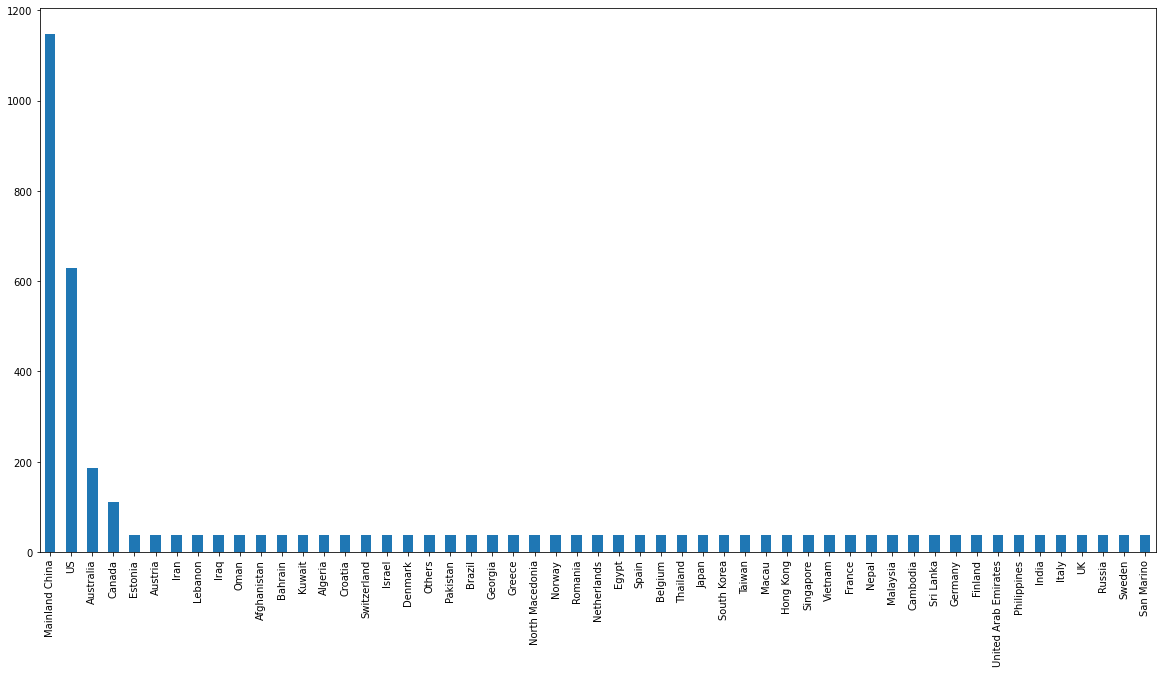

In [33]:
df['Country_Region'].value_counts().plot(kind='bar', figsize=(20,10))

In [34]:
#how many countries affected
df['Country_Region'].unique()

array(['Mainland China', 'Thailand', 'Japan', 'South Korea', 'Taiwan',
       'US', 'Macau', 'Hong Kong', 'Singapore', 'Vietnam', 'France',
       'Nepal', 'Malaysia', 'Canada', 'Australia', 'Cambodia',
       'Sri Lanka', 'Germany', 'Finland', 'United Arab Emirates',
       'Philippines', 'India', 'Italy', 'UK', 'Russia', 'Sweden', 'Spain',
       'Belgium', 'Others', 'Egypt', 'Iran', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Denmark', 'Estonia', 'Netherlands', 'San Marino'], dtype=object)

In [35]:
# number of countries affected
len(df['Country_Region'].unique())

53

# check for markdown
+ lat/long 
+ geometry/point


In [37]:
dir(geo)

['GeoDataFrame',
 'GeoSeries',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_compat',
 '_config',
 '_decorator',
 '_vectorized',
 '_version',
 'array',
 'base',
 'clip',
 'datasets',
 'explore',
 'geodataframe',
 'geopandas',
 'geoseries',
 'gpd',
 'io',
 'np',
 'options',
 'overlay',
 'pd',
 'plotting',
 'points_from_xy',
 'read_feather',
 'read_file',
 'read_parquet',
 'read_postgis',
 'show_versions',
 'sindex',
 'sjoin',
 'sjoin_nearest',
 'tools']

In [38]:
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0


In [41]:
#Converting data to GeoDataFrame
gdf01 = geo.GeoDataFrame(df,geometry=geo.points_from_xy(df['Long'],df['Lat']))

In [42]:
gdf01.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)


In [43]:
type(gdf01)

geopandas.geodataframe.GeoDataFrame

In [46]:
# method 2

points = [ Point(x,y) for x,y in zip(df.Long,df.Lat)]

In [47]:
gdf03 = geo.GeoDataFrame(df,geometry=points)

In [48]:
gdf03

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)
...,...,...,...,...,...,...,...,...,...
3880,NaN,Romania,45.9432,24.9668,2/27/20,1,0,0,POINT (24.96680 45.94320)
3881,NaN,Denmark,56.2639,9.5018,2/27/20,1,0,0,POINT (9.50180 56.26390)
3882,NaN,Estonia,58.5953,25.0136,2/27/20,1,0,0,POINT (25.01360 58.59530)
3883,NaN,Netherlands,52.1326,5.2913,2/27/20,1,0,0,POINT (5.29130 52.13260)


<AxesSubplot:>

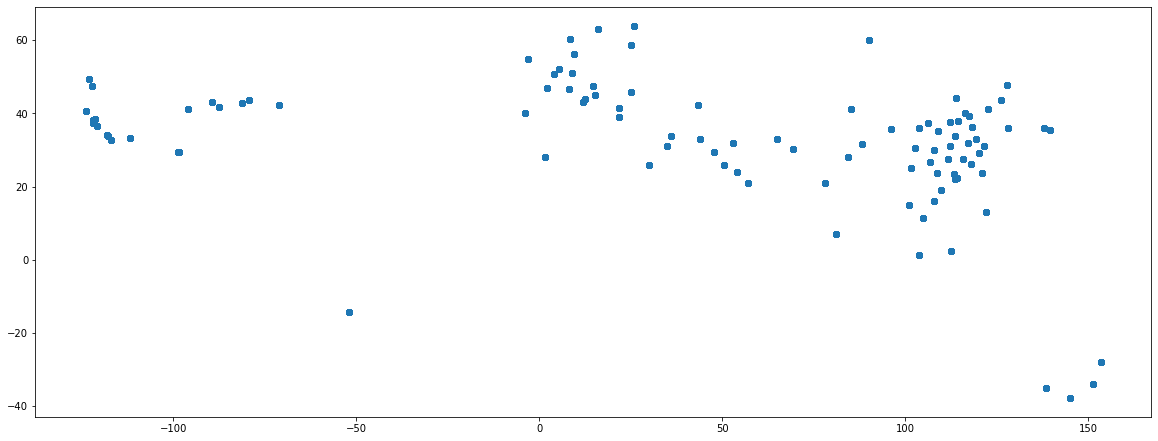

In [49]:
# Map plot
gdf01.plot(figsize=(20,10))

(-198.0, 198.00000000000006, -98.6822565, 92.3273865)

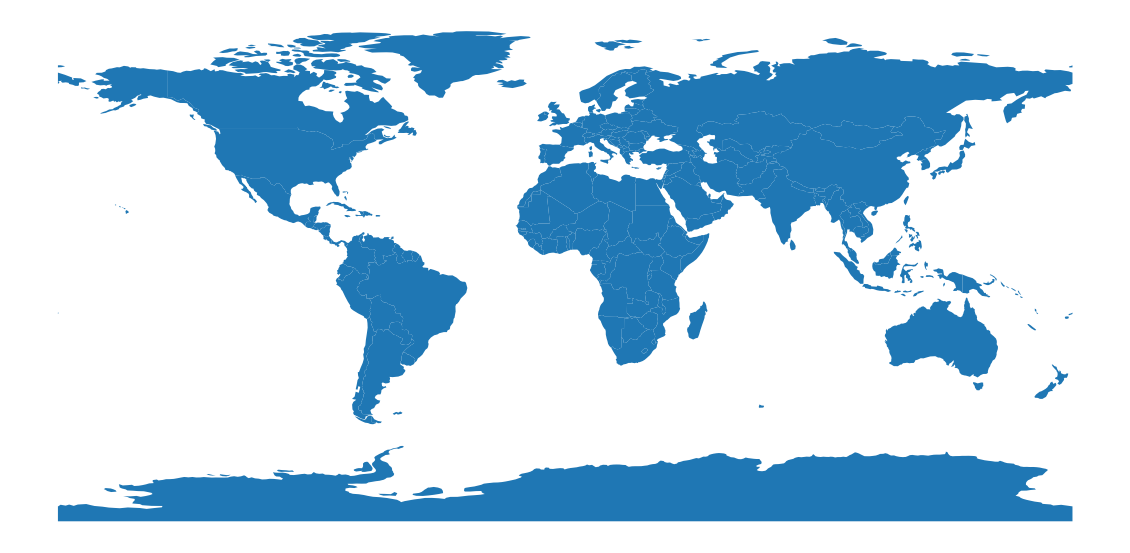

In [51]:
# overlapping with world map
world = geo.read_file(geo.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(20,10))
ax.axis('off')

<AxesSubplot:>

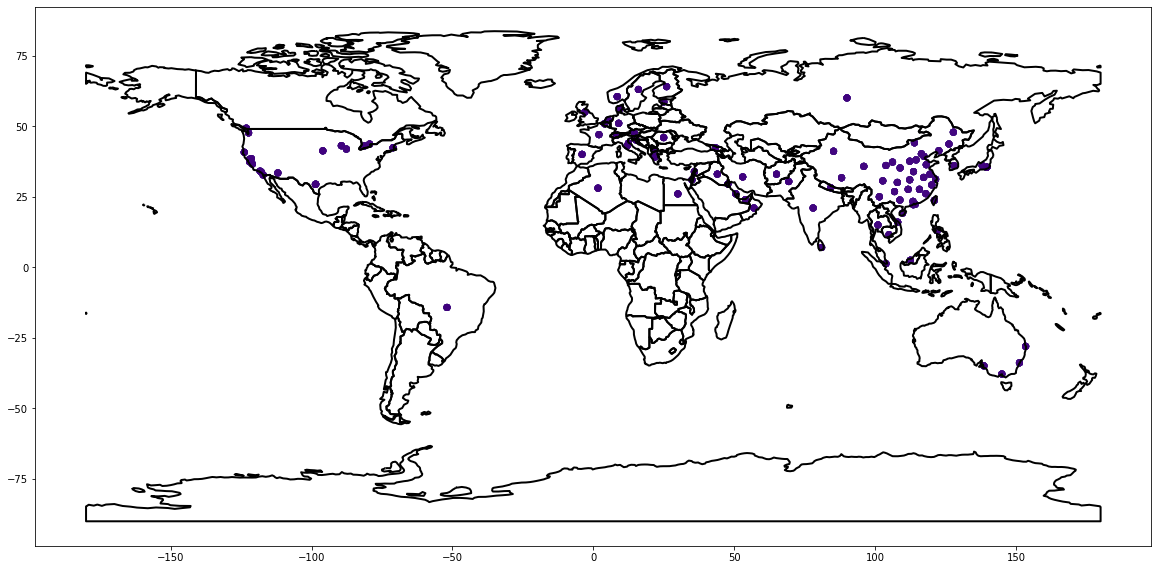

In [52]:
# Overlap
fig,ax = plt.subplots(figsize=(20,10))
gdf01.plot(cmap='Purples',ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

In [53]:
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)


In [54]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [55]:
world['continent'].unique()

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

In [56]:
europe = world[world['continent']== 'Europe']

In [57]:
europe

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
18,144373535.0,Europe,Russia,RUS,1699876,"MULTIPOLYGON (((180.00000 71.51571, 180.00000 ..."
21,5347896.0,Europe,Norway,NOR,403336,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80..."
43,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."
110,10285453.0,Europe,Sweden,SWE,530883,"POLYGON ((11.02737 58.85615, 11.46827 59.43239..."
111,9466856.0,Europe,Belarus,BLR,63080,"POLYGON ((28.17671 56.16913, 29.22951 55.91834..."
112,44385155.0,Europe,Ukraine,UKR,153781,"POLYGON ((32.15944 52.06125, 32.41206 52.28869..."
113,37970874.0,Europe,Poland,POL,595858,"POLYGON ((23.48413 53.91250, 23.52754 53.47012..."
114,8877067.0,Europe,Austria,AUT,445075,"POLYGON ((16.97967 48.12350, 16.90375 47.71487..."
115,9769949.0,Europe,Hungary,HUN,163469,"POLYGON ((22.08561 48.42226, 22.64082 48.15024..."
116,2657637.0,Europe,Moldova,MDA,11968,"POLYGON ((26.61934 48.22073, 26.85782 48.36821..."


In [59]:
df[df['Country_Region'] == 'Mainland China']

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)
...,...,...,...,...,...,...,...,...,...
3806,Tianjin,Mainland China,39.3054,117.3230,2/27/20,136,3,102,POINT (117.32300 39.30540)
3807,Tibet,Mainland China,31.6927,88.0924,2/27/20,1,0,1,POINT (88.09240 31.69270)
3808,Xinjiang,Mainland China,41.1129,85.2401,2/27/20,76,2,43,POINT (85.24010 41.11290)
3809,Yunnan,Mainland China,24.9740,101.4870,2/27/20,174,2,150,POINT (101.48700 24.97400)


In [60]:
gdf01[gdf01['Country_Region'] == 'Mainland China']

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)
...,...,...,...,...,...,...,...,...,...
3806,Tianjin,Mainland China,39.3054,117.3230,2/27/20,136,3,102,POINT (117.32300 39.30540)
3807,Tibet,Mainland China,31.6927,88.0924,2/27/20,1,0,1,POINT (88.09240 31.69270)
3808,Xinjiang,Mainland China,41.1129,85.2401,2/27/20,76,2,43,POINT (85.24010 41.11290)
3809,Yunnan,Mainland China,24.9740,101.4870,2/27/20,174,2,150,POINT (101.48700 24.97400)


<AxesSubplot:>

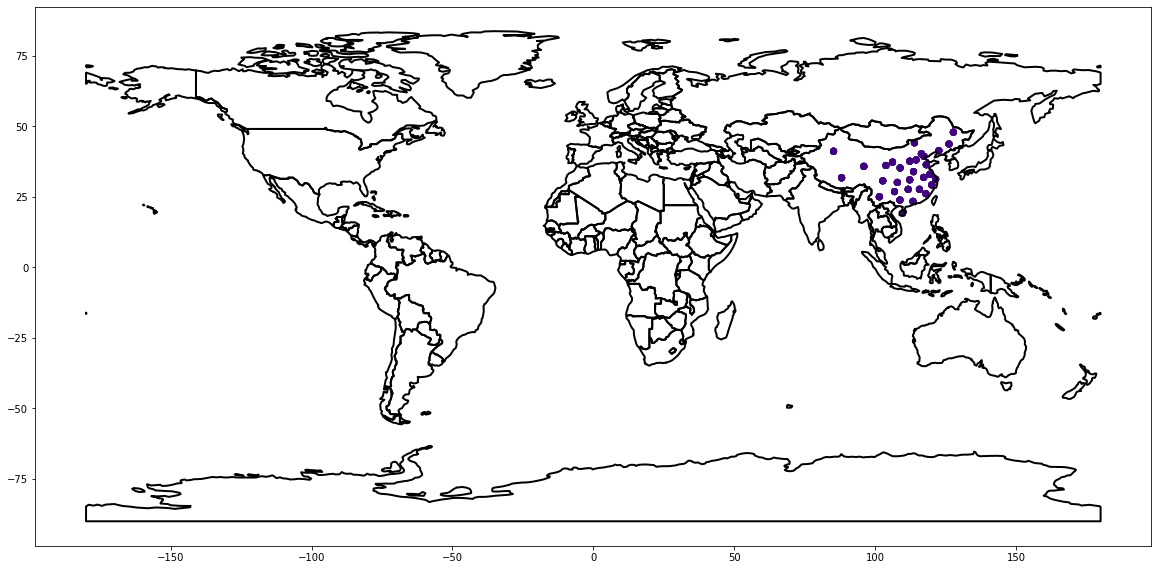

In [61]:
# Overlap
fig,ax = plt.subplots(figsize=(20,10))
gdf01[gdf01['Country_Region'] == 'Mainland China'].plot(cmap='Purples',ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

In [64]:
asia = world[world['continent']== 'Asia']

<AxesSubplot:>

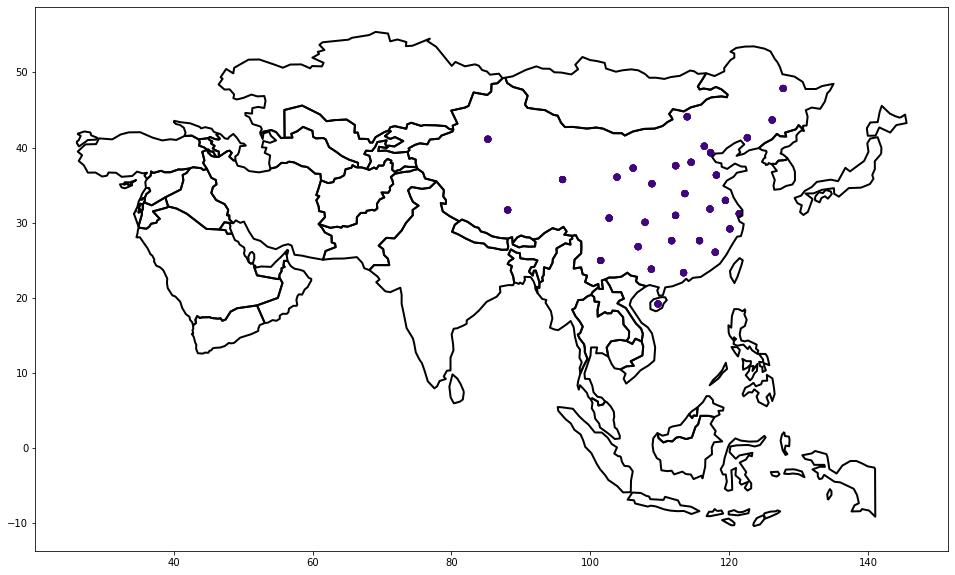

In [65]:
# Overlap
fig,ax = plt.subplots(figsize=(20,10))
gdf01[gdf01['Country_Region'] == 'Mainland China'].plot(cmap='Purples',ax=ax)
asia.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

<AxesSubplot:>

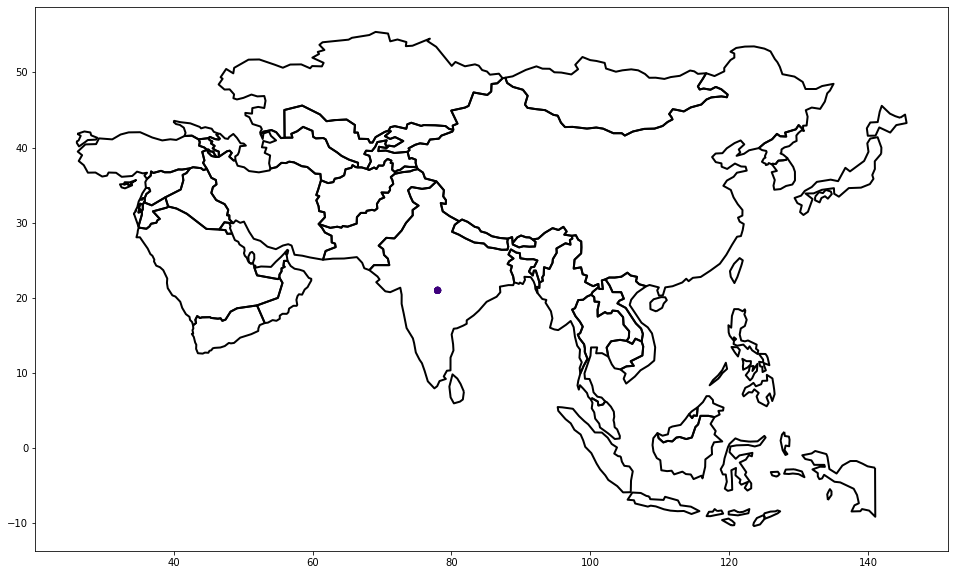

In [66]:
# Overlap
fig,ax = plt.subplots(figsize=(20,10))
gdf01[gdf01['Country_Region'] == 'India'].plot(cmap='Purples',ax=ax)
asia.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

In [69]:
africa = world[world['continent']== 'Africa']
north_america = world[world['continent']== 'North America']


<AxesSubplot:>

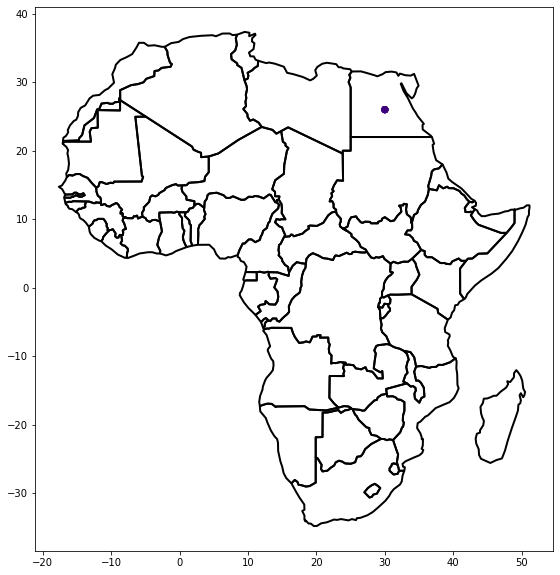

In [70]:

# Overlap
fig,ax = plt.subplots(figsize=(20,10))
gdf01[gdf01['Country_Region'] == 'Egypt'].plot(cmap='Purples',ax=ax)
africa.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)


<AxesSubplot:>

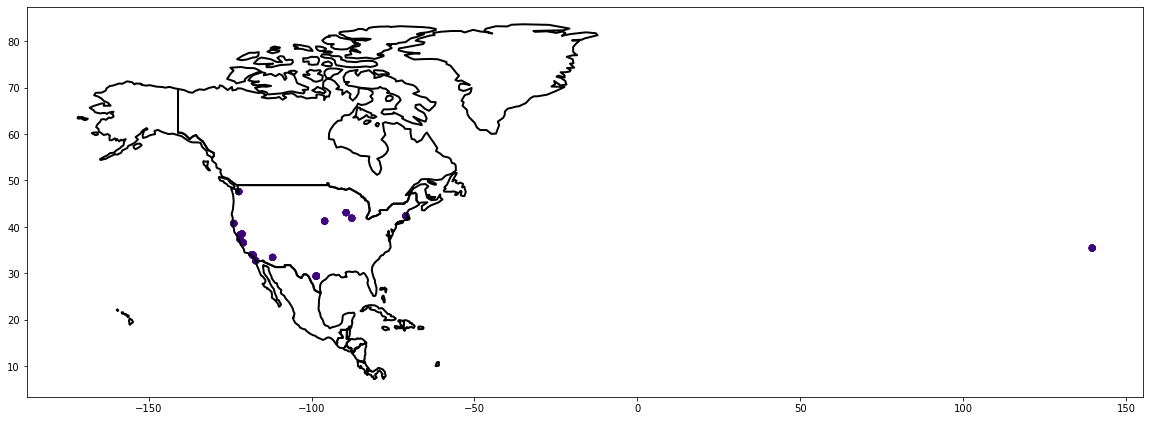

In [71]:
# Overlap
fig,ax = plt.subplots(figsize=(20,10))
gdf01[gdf01['Country_Region'] == 'US'].plot(cmap='Purples',ax=ax)
north_america.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

In [72]:
    
 
# Time Series Analysis
df.head()


,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)


In [73]:
df_per_day

,Confirmed,Deaths,Recovered
Date,,,
02-01-2020,7153,249,168
02-02-2020,11177,350,295
02-03-2020,13522,414,386
02-04-2020,16678,479,522
02-05-2020,19665,549,633
02-06-2020,22112,618,817
02-07-2020,24953,699,1115
02-08-2020,27100,780,1439
02-09-2020,29631,871,1795


In [74]:
df2=df

In [75]:
df.to_csv("coronavirus_data_clean.csv")

In [76]:
import datetime as dt

In [77]:
df['cases_date'] = pd.to_datetime(df2['Date'])

In [78]:
df2.dtypes

Province_State            object
Country_Region            object
Lat                      float64
Long                     float64
Date                      object
Confirmed                  int64
Deaths                     int64
Recovered                  int64
geometry                geometry
cases_date        datetime64[ns]
dtype: object

<AxesSubplot:>

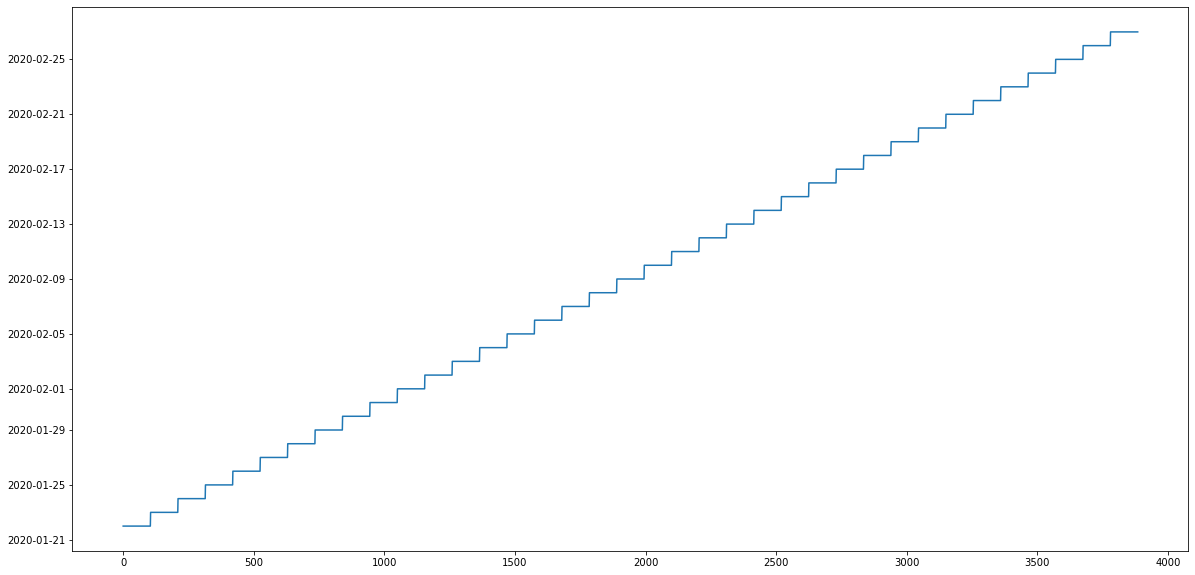

In [79]:
df['cases_date'].plot(figsize=(20,10))

In [81]:
ts = df2.set_index('cases_date')

In [82]:
# select for january
ts.loc['2020-01']

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
cases_date,,,,,,,,,
2020-01-22,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
2020-01-22,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2020-01-22,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
2020-01-22,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
2020-01-22,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)
...,...,...,...,...,...,...,...,...,...
2020-01-31,NaN,Romania,45.9432,24.9668,1/31/20,0,0,0,POINT (24.96680 45.94320)
2020-01-31,NaN,Denmark,56.2639,9.5018,1/31/20,0,0,0,POINT (9.50180 56.26390)
2020-01-31,NaN,Estonia,58.5953,25.0136,1/31/20,0,0,0,POINT (25.01360 58.59530)


In [83]:
ts.loc['2020-02-24':'2020-02-25']


,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
cases_date,,,,,,,,,
2020-02-24,Anhui,Mainland China,31.8257,117.2264,2/24/20,989,6,663,POINT (117.22640 31.82570)
2020-02-24,Beijing,Mainland China,40.1824,116.4142,2/24/20,399,4,198,POINT (116.41420 40.18240)
2020-02-24,Chongqing,Mainland China,30.0572,107.8740,2/24/20,576,6,349,POINT (107.87400 30.05720)
2020-02-24,Fujian,Mainland China,26.0789,117.9874,2/24/20,293,1,183,POINT (117.98740 26.07890)
2020-02-24,Gansu,Mainland China,36.0611,103.8343,2/24/20,91,2,80,POINT (103.83430 36.06110)
...,...,...,...,...,...,...,...,...,...
2020-02-25,NaN,Romania,45.9432,24.9668,2/25/20,0,0,0,POINT (24.96680 45.94320)
2020-02-25,NaN,Denmark,56.2639,9.5018,2/25/20,0,0,0,POINT (9.50180 56.26390)
2020-02-25,NaN,Estonia,58.5953,25.0136,2/25/20,0,0,0,POINT (25.01360 58.59530)


In [84]:
ts.loc['2020-02-24':'2020-02-25'][['Confirmed','Recovered']]


,Confirmed,Recovered
cases_date,,
2020-02-24,989,663
2020-02-24,399,198
2020-02-24,576,349
2020-02-24,293,183
2020-02-24,91,80
...,...,...
2020-02-25,0,0
2020-02-25,0,0
2020-02-25,0,0


<AxesSubplot:xlabel='cases_date'>

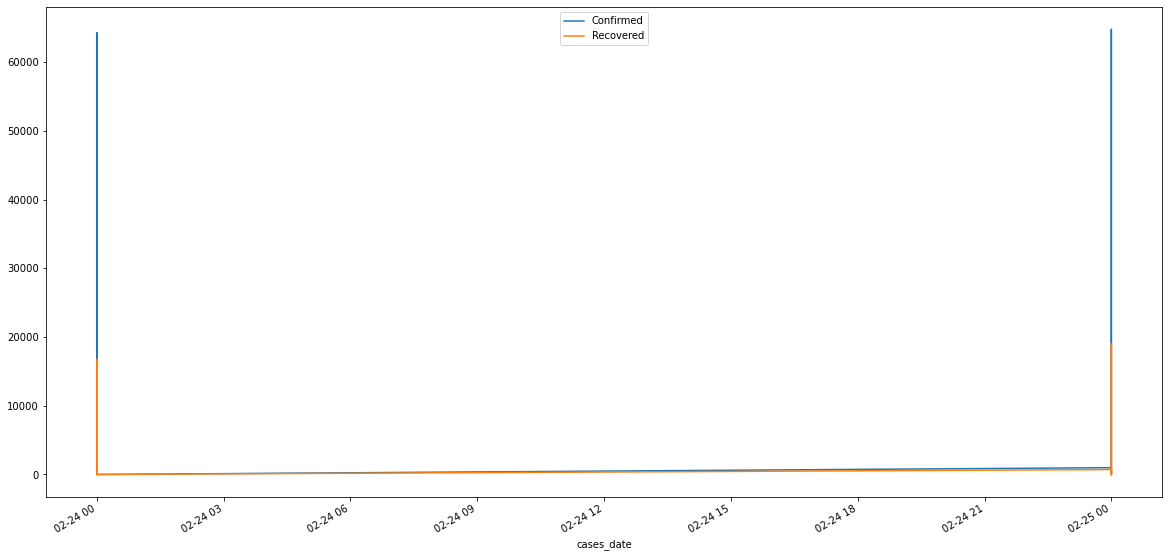

In [85]:
ts.loc['2020-02-24':'2020-02-25'][['Confirmed','Recovered']].plot(figsize=(20,10))


In [86]:
df_by_date = ts.groupby(['cases_date']).sum().reset_index(drop=None)


In [87]:
df_by_date

,cases_date,Lat,Long,Confirmed,Deaths,Recovered
0,2020-01-22,3386.46002,4806.4548,555,17,28
1,2020-01-23,3386.46002,4806.4548,653,18,30
2,2020-01-24,3386.46002,4806.4548,941,26,36
3,2020-01-25,3386.46002,4806.4548,1434,42,39
4,2020-01-26,3386.46002,4806.4548,2118,56,52
5,2020-01-27,3386.46002,4806.4548,2927,82,61
6,2020-01-28,3386.46002,4806.4548,5578,131,107
7,2020-01-29,3386.46002,4806.4548,6166,133,126
8,2020-01-30,3386.46002,4806.4548,8234,171,143
9,2020-01-31,3386.46002,4806.4548,9927,213,222


In [88]:
df_by_date.columns


Index(['cases_date', 'Lat', 'Long', 'Confirmed', 'Deaths', 'Recovered'], dtype='object')

<AxesSubplot:>

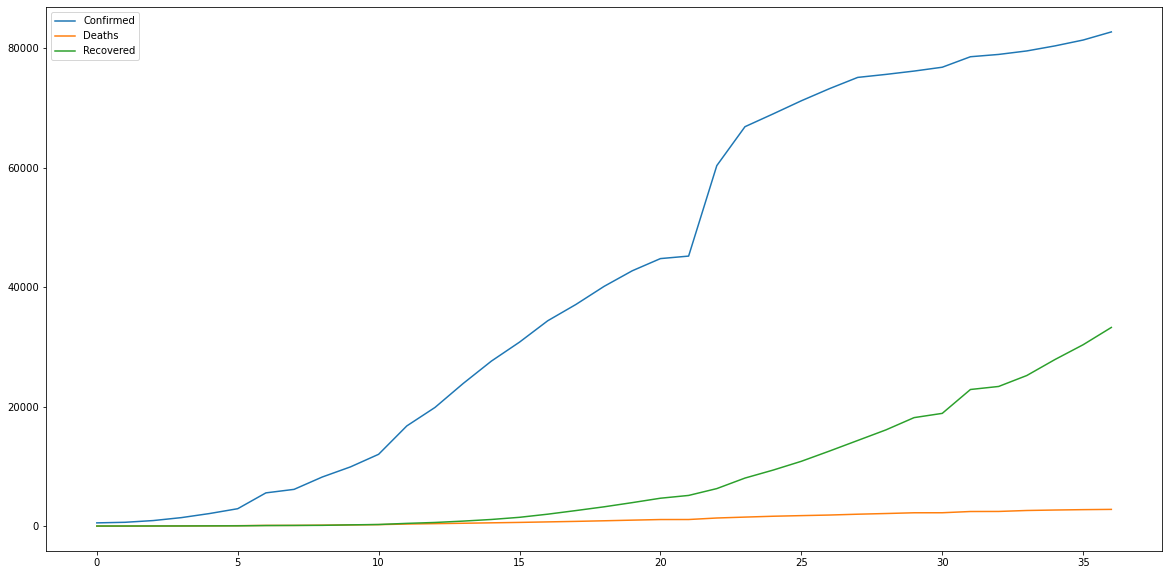

In [89]:
df_by_date[['Confirmed', 'Deaths', 'Recovered']].plot(kind='line',figsize=(20,10))
